In [1]:
import rootedtrees as rt

## Sorted representation

Since our trees are planar, different orderings of the same tree are treated as equal. The Tree.sorted() method gives the ordering of the tree with the heaviest branches on the right

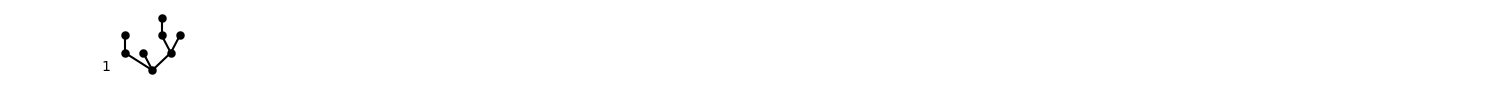

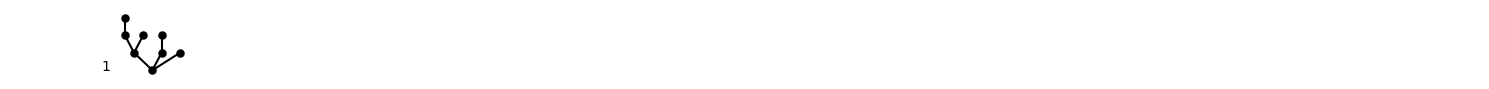

True


In [2]:
t = rt.Tree([[[]], [],[[[]],[]]])
rt.display(t)
rt.display(t.sorted())
print(t == t.sorted())

## Singleton-reduced representation

When the number of nodes is constant in a sum, it is useful to ignore redundant occurances of the tree with one node

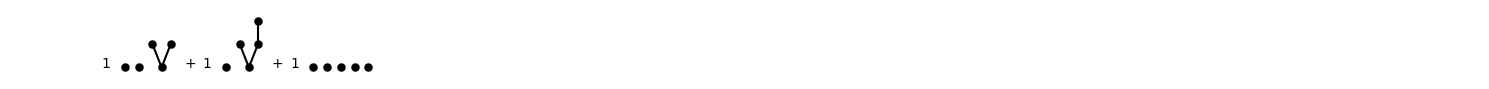

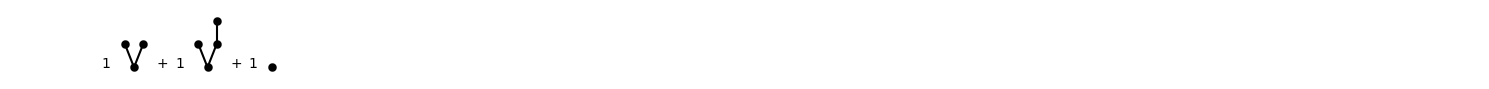

In [3]:
t1 = rt.Tree([])
t2 = rt.Tree([[],[]])
t3 = rt.Tree([[],[[]]])
f = t1 * t1 * t2 + t1 * t3 + t1 * t1 * t1 * t1 * t1
rt.display(f)
rt.display(f.singleton_reduced())

## Arithmetic

1*[[], []] + -2*[[], [], [[]]] [[]]


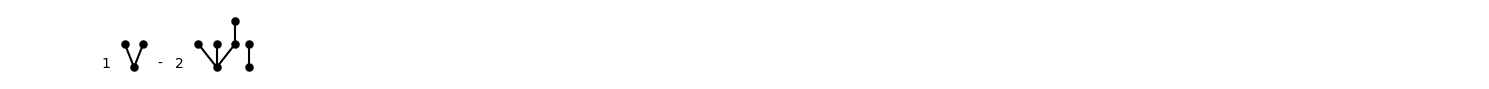

In [4]:
t1 = rt.Tree([[],[]])
t2 = rt.Tree([[],[],[[]]])
t3 = rt.Tree([[]])
t4 = t1 - 2 * t2 * t3
print(t4)
rt.display(t4)

## Antipode

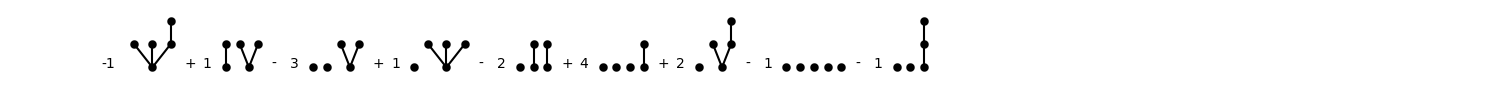

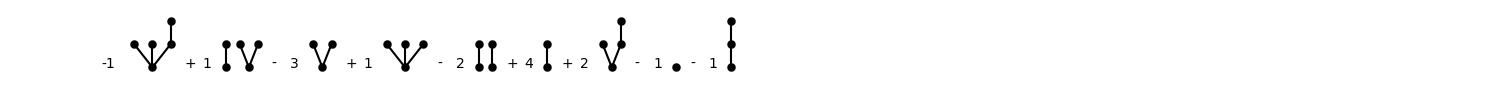

In [5]:
t1 = rt.Tree([[],[],[[]]])
t2 = t1.antipode()
rt.display(t2)
rt.display(t2.singleton_reduced())

In [6]:
print(t2)

-1*[[], [], [[]]] + 1*[[]] [[], []] + -3*[] [] [[], []] + 1*[] [[], [], []] + -2*[] [[]] [[]] + 4*[] [] [] [[]] + 2*[] [[], [[]]] + -1*[] [] [] [] [] + -1*[] [] [[[]]]


## Factorial

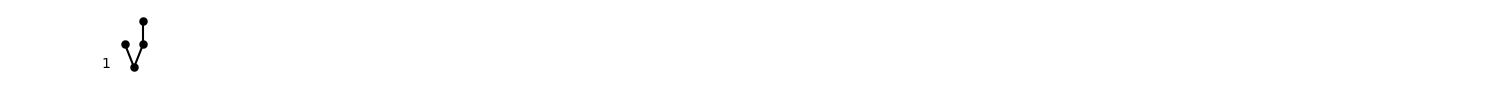

Tree Factorial:  8


In [7]:
t1 = rt.Tree([[],[[]]])
rt.display(t1)
print("Tree Factorial: ", t1.factorial())

# Testing identities of the Butcher-Connes-Kreimer Hopf algebra

In [8]:
#Maps
ident = rt.Map(lambda x : x)
counit = rt.Map(lambda x : 1 if x == rt.Tree(None) else 0)
S = rt.Map(lambda x : x.antipode())
a = rt.Map(lambda x : 1. / x.factorial())

## Antipode Property: $\quad \mu \circ (S \otimes \mathrm{Id}) \circ \Delta = \varepsilon$

In [9]:
for t in rt.trees_up_to_order(4):
    print(counit(t), (S*ident)(t))

1 1*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅


## $S \circ S = \mathrm{Id}$

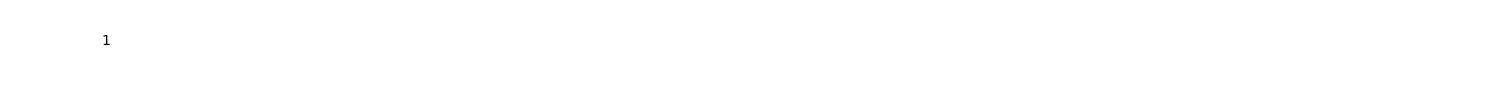

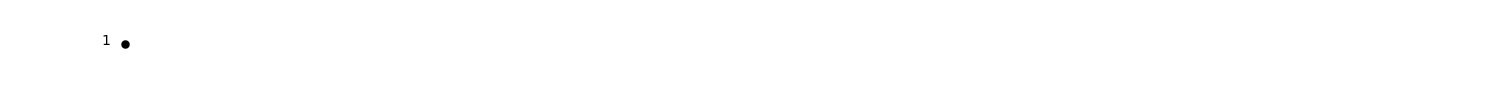

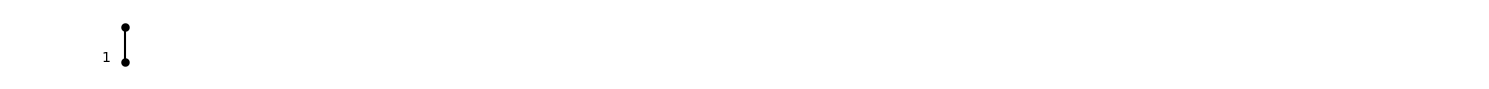

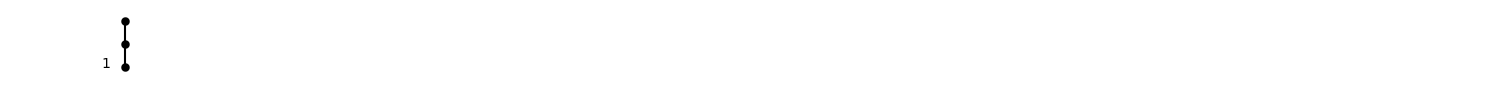

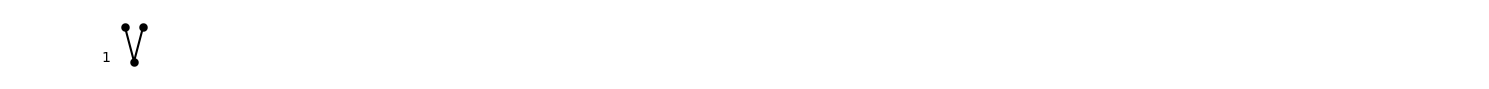

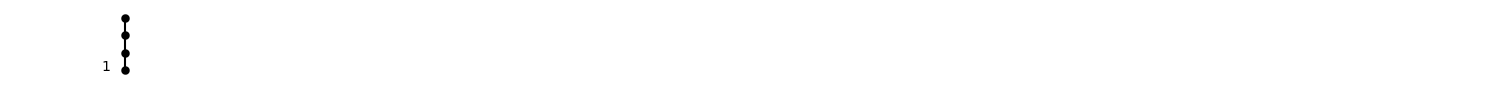

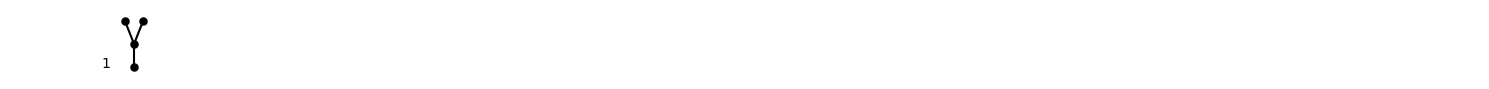

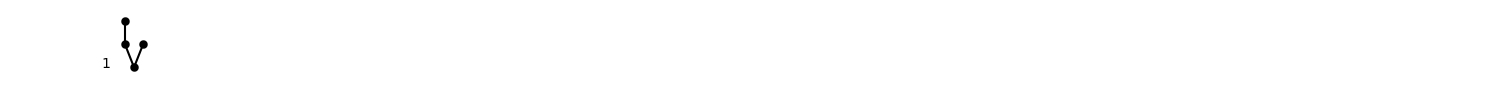

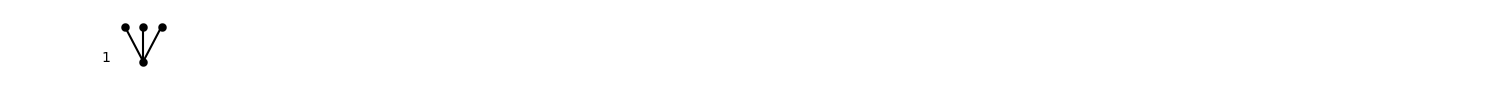

In [10]:
for t in rt.trees_up_to_order(4):
    rt.display((S @ S)(t)) # @ is composition of maps. (S @ S)(t) is equivalent to t.antipode().antipode()

## $(\mathrm{Id} - S \circ S)^{|\tau|}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [11]:
g = ident - S @ S
f = rt.Map(lambda x : (g**x.nodes())(x))

for t in rt.trees_up_to_order(4):
    if t == rt.Tree(None):
        continue
    print(f(t))

0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅


## $(\mathrm{Id} + S) \circ (\mathrm{Id} - S\circ S)^{|\tau| - 1}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [12]:
f1 = ident + S
f2 = ident - S @ S

f3 = rt.Map(lambda x : (f2 ** (x.nodes() - 1))(x) )

f = f1 @ f3

for t in rt.trees_up_to_order(4):
    if t == rt.Tree(None):
        continue
    print(f(t))

0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅


## $a^2(\tau) / 2^{|\tau|} = a(\tau), \quad a(\tau) = 1/\tau!$

In [13]:
for t in rt.trees_up_to_order(4):
    print(a(t), (a**2)(t) / 2**t.nodes())

1.0 1.0
1.0 1.0
0.5 0.5
0.16666666666666666 0.16666666666666666
0.3333333333333333 0.3333333333333333
0.041666666666666664 0.041666666666666664
0.08333333333333333 0.08333333333333333
0.125 0.125
0.25 0.25


## $a^{-1}(\tau) = (-1)^{|\tau|} a(\tau), \quad a(\tau) = 1/\tau!$

In [14]:
for t in rt.trees_up_to_order(4):
    print(a(t), (-1)**t.nodes() * (a**(-1))(t))

1.0 1.0
1.0 1.0
0.5 0.5
0.16666666666666666 0.16666666666666663
0.3333333333333333 0.33333333333333326
0.041666666666666664 0.04166666666666652
0.08333333333333333 0.08333333333333331
0.125 0.12499999999999997
0.25 0.25
